In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import dependecies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file="/content/drive/MyDrive/4조  일반/indeed_job_dataset_ver02.csv"

In [ ]:
indeed=pd.read_csv(file, encoding='utf8')
indeed.head()

,index,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,Description,Location,Company_Revenue,Company_Employees,항공우주공학,농업,금융서비스,IT산업,건설,비즈니스,교육,에너지,정부,의료,제조,보험,방송,부동산,운송,Company_Industry,python,sql,aws,excel,keras,pytorch,scikit,tensor,r,hadoop,tableau,sas,spark,...,IN,KS,KY,LA,MA,MD,MI,MN,MO,MT,NC,ND,NE,NH,NM,NJ,NY,NV,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,"[<p><b>POSITION SUMMARY</b></p>, <p>The Busine...",MO,More than $10B (USD),"10,000+",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Health Care,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,"[<p><b>What do we need?</b></p>, <ul><li>You t...",TX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,na,1,1,0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,"[<ul><li>Validate, analyze, and conduct statis...",OR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,na,1,1,0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,"[<p>Full time</p>, <p>Washington, DC metro are...",DC,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Government,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,Data Scientist I,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,[<ul><li>Assist in consultations with business...,TX,0,"Less than 10,000",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Banks and Financial Services,0,0,0,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
indeed.columns

Index(['index', 'Job_Title', 'Queried_Salary', 'Job_Type', 'Skill',
       'No_of_Skills', 'Company', 'Description', 'Location', 'Company_Revenue',
       'Company_Employees', '항공우주공학', '농업', '금융서비스', 'IT산업', '건설', '비즈니스',
       '교육', '에너지', '정부', '의료', '제조', '보험', '방송', '부동산', '운송',
       'Company_Industry', 'python', 'sql', 'aws', 'excel', 'keras', 'pytorch',
       'scikit', 'tensor', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java',
       'scala', 'flink', 'mongo', 'google_an', 'Degree', 'AL', 'AR', 'AZ',
       'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN',
       'KS', 'KY', 'LA', 'MA', 'MD', 'MI', 'MN', 'MO', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NM', 'NJ', 'NY', 'NV', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY',
       'Consulting and Business Services', 'Internet and Software',
       'Banks and Financial Services', 'Health Care', 'Insurance',
       'Other_industries'],
      dtype='object')

In [ ]:
indeed_STA=indeed.groupby("Location")
indeed_STA

In [ ]:
STA_count=indeed_STA.count()
STA_count.head()

,index,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,Description,Company_Revenue,Company_Employees,항공우주공학,농업,금융서비스,IT산업,건설,비즈니스,교육,에너지,정부,의료,제조,보험,방송,부동산,운송,Company_Industry,python,sql,aws,excel,keras,pytorch,scikit,tensor,r,hadoop,tableau,sas,spark,java,...,IN,KS,KY,LA,MA,MD,MI,MN,MO,MT,NC,ND,NE,NH,NM,NJ,NY,NV,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
Location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,...,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252
AL,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
AR,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
AZ,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
CA,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,...,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395


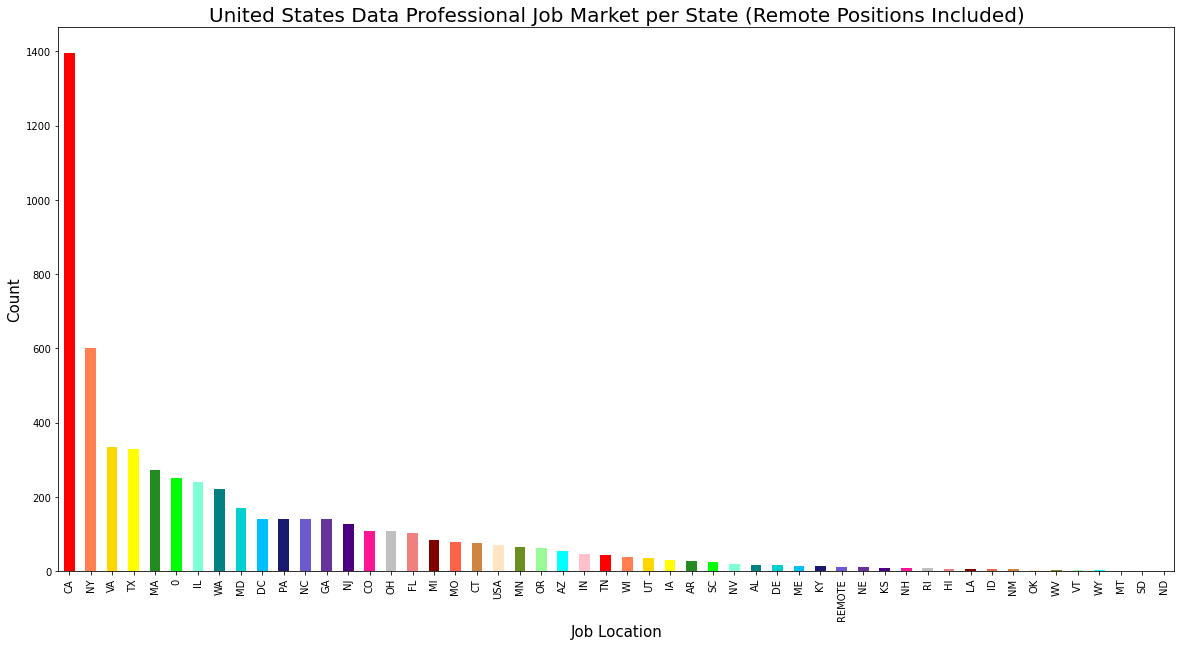

In [ ]:
plt.figure(figsize=(20,10))
ax=STA_count["Job_Title"].sort_values(ascending=False).plot(kind="bar",color=['red', 'coral', 'gold', 'yellow', 'forestgreen',
                                                                             "lime",'aquamarine','teal','darkturquoise','deepskyblue',
                                                                             'midnightblue','slateblue','rebeccapurple','indigo','deeppink',
                                                                             'silver','lightcoral','maroon','tomato',"peru",
                                                                             'bisque','olivedrab','palegreen',"cyan","pink"])
#plt.tight_layout()
plt.title("United States Data Professional Job Market per State (Remote Positions Included)",fontsize=20)
plt.xlabel("Job Location",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

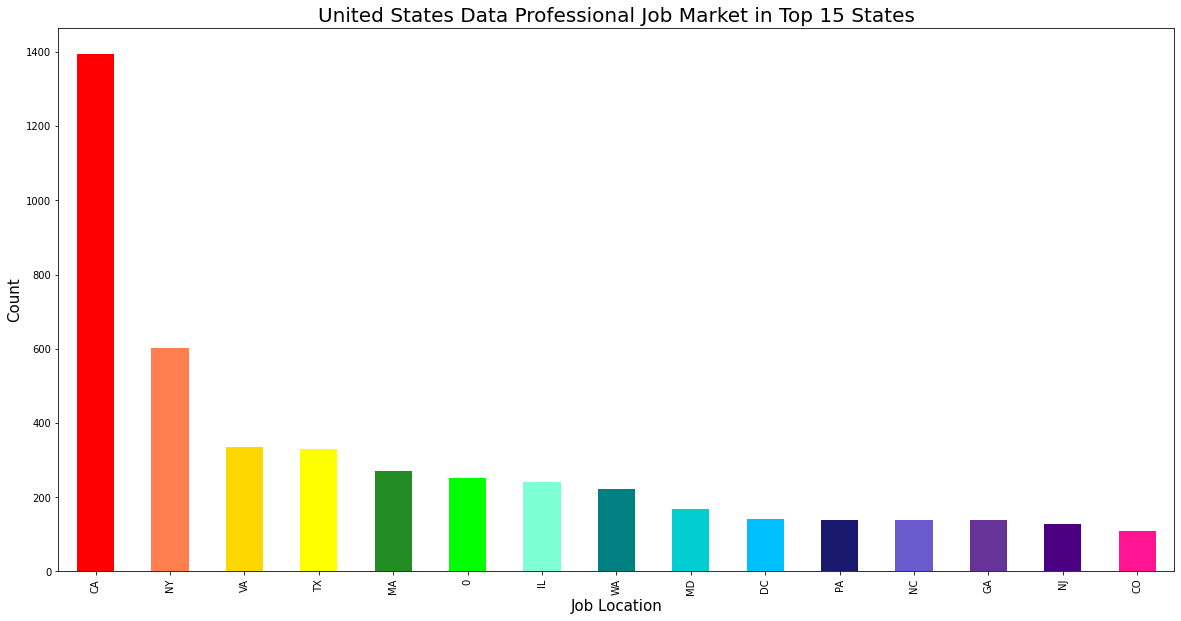

In [ ]:
plt.figure(figsize=(20,10))
ax1=STA_count["Job_Title"].sort_values(ascending=False).head(15).plot(kind="bar",color=['red', 'coral', 'gold', 'yellow', 'forestgreen',
                                                                             "lime",'aquamarine','teal','darkturquoise','deepskyblue',
                                                                             'midnightblue','slateblue','rebeccapurple','indigo','deeppink'])
plt.title("United States Data Professional Job Market in Top 15 States",fontsize=20)
plt.xlabel("Job Location",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [ ]:
job_count=pd.DataFrame(STA_count["Job_Title"].sort_values(ascending=False))
job_count.head(20)

,Job_Title
Location,
CA,1395
NY,601
VA,334
TX,329
MA,271
0,252
IL,240
WA,222
MD,169


In [ ]:
job_series = indeed.groupby('Location')["Job_Type"].count()
job_df = pd.DataFrame((job_series).sort_values(ascending = True))
job_df.head()
job_df1 = job_df.reset_index(inplace = False)
job_df1.head()

,Location,Job_Type
0,MT,1
1,SD,1
2,ND,1
3,VT,2
4,WY,2


In [ ]:
job_series = indeed.groupby('Location')['Job_Type'].count()
job_df = pd.DataFrame(job_series)
job_df.reset_index(inplace = True)
job_df['Job_Type'].sort_values(ascending=True)

#https://wellsr.com/python/creating-python-choropleth-maps-with-plotly/
#   (pip install plotly_express)  ran this in terminal
import plotly.express as px  # Be sure to import express
fig = px.choropleth(job_df,  # Input Pandas DataFrame
                   locations='Location',  # DataFrame column with locations
                   color='Job_Type',  # DataFrame column with color values
                   hover_name='Job_Type', # DataFrame column hover info
                   locationmode = 'USA-states',
                   color_continuous_scale='YlOrRd'
                   )
                  #color_continuous_scale=px.colors.diverging.RdYlGn[::-1]) # Set to plot as US States
fig.update_layout(
   title_text = 'Data Professional Jobs in USA', # Create a Title
   geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output the plot to the screen

In [ ]:
indeed_STATE=indeed.set_index(["Location"])

In [ ]:
#Data cleaning: removing operators and hyphens from the Queried_Salary column and creating a new Salary column
indeed_STATE["Salary"]=indeed_STATE["Queried_Salary"].str.replace("<","")
indeed_STATE["Salary"]=indeed_STATE["Salary"].str.replace(">","")
indeed_STATE["Salary"]=indeed_STATE["Salary"].str.replace("80000-99999","84999")
indeed_STATE["Salary"]=indeed_STATE["Salary"].str.replace("100000-119999","109999")
indeed_STATE["Salary"]=indeed_STATE["Salary"].str.replace("120000-139999","129999")
indeed_STATE["Salary"]=indeed_STATE["Salary"].str.replace("140000-159999","149999")
indeed_STATE

,index,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,Description,Company_Revenue,Company_Employees,항공우주공학,농업,금융서비스,IT산업,건설,비즈니스,교육,에너지,정부,의료,제조,보험,방송,부동산,운송,Company_Industry,python,sql,aws,excel,keras,pytorch,scikit,tensor,r,hadoop,tableau,sas,spark,java,...,KS,KY,LA,MA,MD,MI,MN,MO,MT,NC,ND,NE,NH,NM,NJ,NY,NV,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries,Salary
Location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MO,0,Data Scientist,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,"[<p><b>POSITION SUMMARY</b></p>, <p>The Busine...",More than $10B (USD),"10,000+",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Health Care,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,80000
TX,1,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,"[<p><b>What do we need?</b></p>, <ul><li>You t...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,na,1,1,0,1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,80000
OR,2,Data Scientist,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,"[<ul><li>Validate, analyze, and conduct statis...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,na,1,1,0,1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80000
DC,3,Graduate Studies Program - Data Scientist,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,"[<p>Full time</p>, <p>Washington, DC metro are...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Government,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,80000
TX,4,Data Scientist I,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,[<ul><li>Assist in consultations with business...,0,"Less than 10,000",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Banks and Financial Services,0,0,0,1,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,80000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,5710,Senior Data Engineer,>160000,data_engineer,"['Hive', 'Hadoop', 'Oracle', 'SQL', 'HBase', '...",12,Intelliswift Software Inc,na,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,na,1,1,0,0,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,160000
CA,5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",>160000,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",8,Jobspring Partners,[<p>Want to change the world? How about contri...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Human Resources and Staffing,0,0,1,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,160000
DE,5712,Executive Director- Architect: Data Engineerin...,>160000,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13,JPMorgan Chase,[<ul><li>Identify and solve hybrid cloud data ...,More than $10B (USD),"10,000+",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Banks and Financial Services,0,0,1,1,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,160000


In [ ]:
indeed_STATE["Queried_Salary"].value_counts()

100000-119999    1394
120000-139999    1292
80000-99999       953
140000-159999     873
<80000            788
>160000           415
Name: Queried_Salary, dtype: int64

In [ ]:
indeed_STATE["Queried_Salary"].value_counts()

100000-119999    1394
120000-139999    1292
80000-99999       953
140000-159999     873
<80000            788
>160000           415
Name: Queried_Salary, dtype: int64

In [ ]:
#Converting the Salary column from string to interger in order to apply mathematical processes
indeed_STATE["Salary"]=indeed_STATE["Salary"].astype(int)
state_avg_salary=indeed_STATE.groupby("Location").mean().round(2)["Salary"].sort_values(ascending=False)
state_salary=pd.DataFrame(state_avg_salary)
state_salary.head(20)

,Salary
Location,
CA,128017.13
0,124443.52
NY,123618.27
VA,117544.05
WA,117499.16
DE,117057.94
USA,115914.63
NJ,115233.62
MA,114242.78


In [ ]:
# type of job/job title (pie chart)
count_of_jobstypes=indeed['Job_Type'].value_counts()
count_of_jobstypes_df=pd.DataFrame(count_of_jobstypes)

#count_of_jobstypes_df.index.name="JobType"
count_of_jobstypes_df

,Job_Type
data_scientist,2543
data_analyst,1793
data_engineer,1379


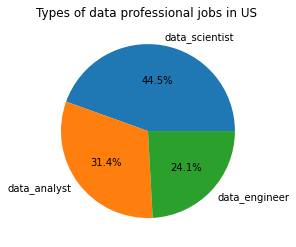

In [ ]:
plt.pie(count_of_jobstypes_df['Job_Type'],labels=count_of_jobstypes_df.index,autopct="%1.1f%%")
plt.title("Types of data professional jobs in US ")
plt.show()

In [ ]:
#top 10 companies (bar chart)
count_of_company=indeed['Company'].value_counts()
count_of_company_df=pd.DataFrame(count_of_company)
new_company_count_df=count_of_company_df.head(10)
new_company_count_df

,Company
Booz Allen Hamilton,151
na,104
Harnham,87
Capgemini,84
Facebook,65
KPMG LLP,64
Walmart,59
Capital One,54
JPMorgan Chase,51
Google,40


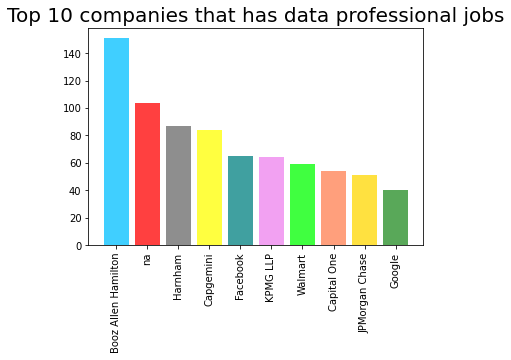

In [ ]:
x_axis=np.arange(len(new_company_count_df))
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations,new_company_count_df.index,rotation=90)
plt.title("Top 10 companies that has data professional jobs",fontsize="20")
plt.bar(x_axis,new_company_count_df['Company'],alpha=0.75,align="center",color=['deepskyblue','red','dimgray','yellow','teal','violet',"lime",
                                                                                 'coral', 'gold',  'forestgreen',
                                                                             ])

plt.show()

In [ ]:
company_indus_series =indeed['Company_Industry'].value_counts()
company_indus_df = pd.DataFrame(company_indus_series)
company_indus_df.index.name= 'Industry Name'
company_indus_df
new_index_indus = company_indus_df.reset_index()
industry_df = new_index_indus.rename(columns={'Company_Industry':'Available Jobs'})
industry_df

,Industry Name,Available Jobs
0,na,1889
1,Consulting and Business Services,733
2,Internet and Software,647
3,Banks and Financial Services,459
4,Health Care,339
5,Insurance,227
6,Industrial Manufacturing,153
7,Aerospace and Defense,129
8,Retail,122
9,Education and Schools,121


In [ ]:
industry_df.head(10)

,Industry Name,Available Jobs
0,na,1889
1,Consulting and Business Services,733
2,Internet and Software,647
3,Banks and Financial Services,459
4,Health Care,339
5,Insurance,227
6,Industrial Manufacturing,153
7,Aerospace and Defense,129
8,Retail,122
9,Education and Schools,121


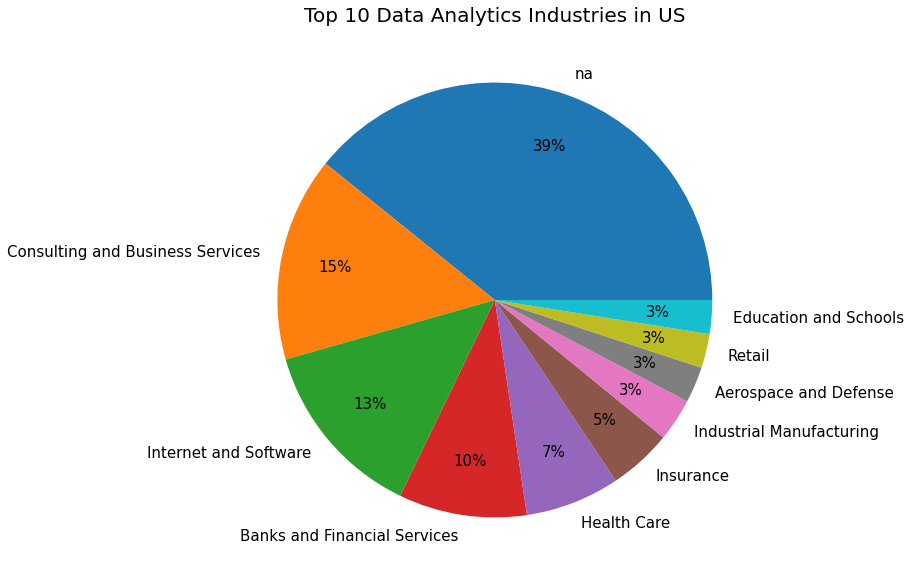

In [ ]:
industry_df =industry_df.head(10)
industry_df
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title('Top 10 Data Analytics Industries in US',fontsize="20")
plt.pie(industry_df['Available Jobs'] , autopct = '%0.f%%',pctdistance=0.75,textprops={'fontsize': 15},
       labels = industry_df['Industry Name']);

In [ ]:
indeed_salary=indeed[['Queried_Salary',"Job_Type" ,'No_of_Skills','python', 'sql',
       'keras', 'pytorch', 'scikit', 'tensor', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java']]
indeed_salary.head()

,Queried_Salary,Job_Type,No_of_Skills,python,sql,keras,pytorch,scikit,tensor,r,hadoop,tableau,sas,spark,java
0,<80000,data_scientist,2,0,1,0,0,0,0,0,0,0,0,0,0
1,<80000,data_scientist,5,1,1,0,0,0,0,1,0,0,1,0,0
2,<80000,data_scientist,9,1,1,0,0,0,0,1,0,0,1,0,0
3,<80000,data_scientist,1,0,0,0,0,0,0,0,0,0,0,0,0
4,<80000,data_scientist,7,0,0,0,0,0,0,1,0,1,0,0,0


In [ ]:
indeed_salary=indeed[['Queried_Salary',"Job_Type" ,'No_of_Skills','python', 'sql',
       'keras', 'pytorch', 'scikit', 'tensor', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java']]

data_ana=indeed_salary[indeed_salary["Job_Type"]=="data_analyst"].drop("Queried_Salary",axis=1)
data_ana.head()

,Job_Type,No_of_Skills,python,sql,keras,pytorch,scikit,tensor,r,hadoop,tableau,sas,spark,java
2543,data_analyst,1,0,0,0,0,0,0,0,0,1,0,0,0
2544,data_analyst,1,0,1,0,0,0,0,0,0,0,0,0,0
2545,data_analyst,2,0,1,0,0,0,0,0,0,0,0,0,0
2546,data_analyst,1,0,1,0,0,0,0,0,0,0,0,0,0
2547,data_analyst,1,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
data_eng=indeed_salary[indeed_salary["Job_Type"]=="data_engineer"].drop("Queried_Salary",axis=1)
data_eng.head()

,Job_Type,No_of_Skills,python,sql,keras,pytorch,scikit,tensor,r,hadoop,tableau,sas,spark,java
4336,data_engineer,5,1,1,0,0,0,0,0,0,0,0,0,0
4337,data_engineer,3,0,1,0,0,0,0,1,0,0,0,0,0
4338,data_engineer,2,0,1,0,0,0,0,1,0,0,0,0,0
4339,data_engineer,9,0,1,0,0,0,0,0,0,0,0,0,0
4340,data_engineer,3,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
data_sci=indeed_salary=indeed[['Queried_Salary',"Job_Type" ,'No_of_Skills','python', 'sql',
       'keras', 'pytorch', 'scikit', 'tensor', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java']]

data_ana=indeed_salary[indeed_salary["Job_Type"]=="data_analyst"].drop("Queried_Salary",axis=1)
data_ana.head()

,Job_Type,No_of_Skills,python,sql,keras,pytorch,scikit,tensor,r,hadoop,tableau,sas,spark,java
2543,data_analyst,1,0,0,0,0,0,0,0,0,1,0,0,0
2544,data_analyst,1,0,1,0,0,0,0,0,0,0,0,0,0
2545,data_analyst,2,0,1,0,0,0,0,0,0,0,0,0,0
2546,data_analyst,1,0,1,0,0,0,0,0,0,0,0,0,0
2547,data_analyst,1,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
data_sci=indeed_salary[indeed_salary["Job_Type"]=="data_scientist"].drop("Queried_Salary",axis=1)
data_sci.head()

,Job_Type,No_of_Skills,python,sql,keras,pytorch,scikit,tensor,r,hadoop,tableau,sas,spark,java
0,data_scientist,2,0,1,0,0,0,0,0,0,0,0,0,0
1,data_scientist,5,1,1,0,0,0,0,1,0,0,1,0,0
2,data_scientist,9,1,1,0,0,0,0,1,0,0,1,0,0
3,data_scientist,1,0,0,0,0,0,0,0,0,0,0,0,0
4,data_scientist,7,0,0,0,0,0,0,1,0,1,0,0,0


In [ ]:
jobs_df = indeed.set_index('Job_Type')
jobs_df_skill = jobs_df.loc[['data_scientist','data_engineer','data_analyst'],
                            ['python','sql','keras', 'pytorch', 'scikit', 'tensor', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java']]
jobs_groups = jobs_df_skill.groupby('Job_Type')
jobs_groups.sum()

,python,sql,keras,pytorch,scikit,tensor,r,hadoop,tableau,sas,spark,java
Job_Type,,,,,,,,,,,,
data_analyst,512,1044,2,1,40,6,456,126,538,310,67,101
data_engineer,901,867,6,7,54,41,228,761,214,67,719,704
data_scientist,1912,1193,145,86,343,408,1550,827,484,564,745,675


In [122]:
print ("Top Four Skills for a Data Analyst")
print("----------------------------------")
print(f'SQL): {sum(data_ana["sql"]==1)}')
print(f'Tableau): {sum(data_ana["tableau"]==1)}')
print(f'Python): {sum(data_ana["python"]==1)}')
print(f'R): {sum(data_ana["r"]==1)}')
print("")
print("Additional Skills for a Data Analyst")
print("------------------------------------")
print(f'SAS): {sum(data_ana["sas"]==1)}')
print(f'Hadoop): {sum(data_ana["hadoop"]==1)}')
print(f'Java): {sum(data_ana["java"]==1)}')
print(f'Spark): {sum(data_ana["spark"]==1)}')
print(f'scikit): {sum(data_ana["scikit"]==1)}')
print(f'tensor): {sum(data_ana["tensor"]==1)}')
print(f'keras): {sum(data_ana["keras"]==1)}')
print(f'pytorch): {sum(data_ana["pytorch"]==1)}')

Top Four Skills for a Data Analyst
----------------------------------
SQL): 1044
Tableau): 538
Python): 512
R): 456

Additional Skills for a Data Analyst
------------------------------------
SAS): 310
Hadoop): 126
Java): 101
Spark): 67
scikit): 40
tensor): 6
keras): 2
pytorch): 1


In [121]:
print ("Top Four Skills for a Data Engineer")
print("-----------------------------------")
print(f'Python): {sum(data_eng["python"]==1)}')
print(f'SQL): {sum(data_eng["sql"]==1)}')
print(f'Hadoop): {sum(data_eng["hadoop"]==1)}')
print(f'Spark): {sum(data_eng["spark"]==1)}')
print("")
print("Additional Skills for a Data Engineer")
print("-------------------------------------")
print(f'Java): {sum(data_eng["java"]==1)}')
print(f'R): {sum(data_eng["r"]==1)}')
print(f'Tableau): {sum(data_eng["tableau"]==1)}')
print(f'SAS): {sum(data_eng["sas"]==1)}')
print(f'scikit): {sum(data_eng["scikit"]==1)}')
print(f'tensor): {sum(data_eng["tensor"]==1)}')
print(f'pytorch): {sum(data_eng["pytorch"]==1)}')
print(f'keras): {sum(data_eng["keras"]==1)}')

Top Four Skills for a Data Engineer
-----------------------------------
Python): 901
SQL): 867
Hadoop): 761
Spark): 719

Additional Skills for a Data Engineer
-------------------------------------
Java): 704
R): 228
Tableau): 214
SAS): 67
scikit): 54
tensor): 41
pytorch): 7
keras): 6


In [120]:
print ("Top Four Skills for a Data Scientist")
print("-------------------------------------")
print(f'Python): {sum(data_sci["python"]==1)}')
print(f'R): {sum(data_sci["r"]==1)}')
print(f'SQL): {sum(data_sci["sql"]==1)}')
print(f'Hadoop): {sum(data_sci["hadoop"]==1)}')
print("")
print("Additional Skills for a Data Scientist")
print("---------------------------------------")
print(f'Spark): {sum(data_sci["spark"]==1)}')
print(f'Java): {sum(data_sci["java"]==1)}')
print(f'SAS): {sum(data_sci["sas"]==1)}')
print(f'Tableau): {sum(data_sci["tableau"]==1)}')
print(f'tensor): {sum(data_sci["tensor"]==1)}')
print(f'scikit): {sum(data_sci["scikit"]==1)}')
print(f'keras): {sum(data_sci["keras"]==1)}')
print(f'pytorch): {sum(data_sci["pytorch"]==1)}')

Top Four Skills for a Data Scientist
-------------------------------------
Python): 1912
R): 1550
SQL): 1193
Hadoop): 827

Additional Skills for a Data Scientist
---------------------------------------
Spark): 745
Java): 675
SAS): 564
Tableau): 484
tensor): 408
scikit): 343
keras): 145
pytorch): 86


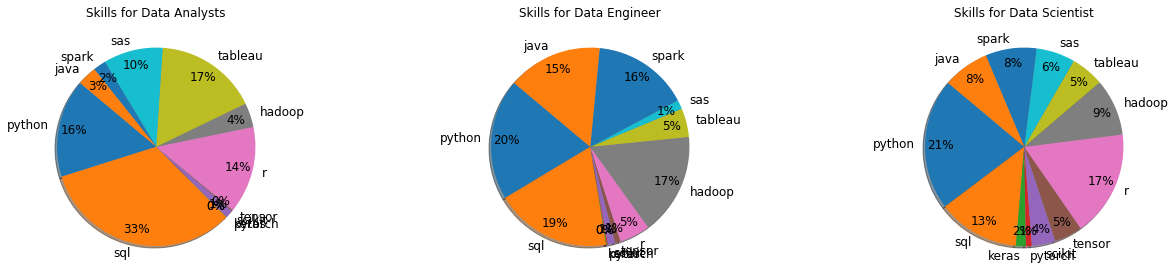

In [ ]:
fig, axes = plt.subplots(1, 3,figsize=(20, 15))
labels1=['python','sql','keras', 'pytorch', 'scikit', 'tensor', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java']
sizes1 =[512,1044,2,1,40,6,456,126,538,310,67,101]
sizes2 =[901,867,6,7,54,41,228,761,214,67,719,704]
sizes3= [1912,1193,145,86,343,408,1550,827,484,564,745,675]
axes[0].pie(sizes1, labels=labels1,autopct='%.0f%%',textprops={'fontsize': 12},
                            shadow=True,pctdistance=0.85, startangle=140)
axes[0].set_title('Skills for Data Analysts')
axes[1].pie(sizes2, labels=labels1,autopct='%.0f%%',textprops={'fontsize': 12},
                   shadow=True,pctdistance=0.85,startangle=140 )
axes[1].set_title('Skills for Data Engineer')
axes[2].pie(sizes3, labels=labels1,autopct='%.0f%%',textprops={'fontsize': 12},
                            shadow=True,pctdistance=0.85,startangle=140 )
axes[2].set_title('Skills for Data Scientist')
fig.subplots_adjust(wspace=0.75)

In [ ]:
#Creating entry level dataframe: (<80000-99999), Mid level dataframe:(100000-139999), Senior level dataframe: (140000->160000)
 
indeed_salary=indeed[['Queried_Salary',"Job_Type" ,'No_of_Skills','python', 'sql',
       'keras', 'pytorch', 'scikit', 'tensor', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java']]

entry_level=indeed_salary[indeed_salary["Queried_Salary"]=="<80000"]
entry_level=entry_level.append(indeed_salary[indeed_salary["Queried_Salary"]=="80000-99999"])
entry_level=entry_level.drop("Job_Type",axis=1)


mid_level=indeed_salary[indeed_salary["Queried_Salary"]=="100000-119999"]
mid_level=mid_level.append(indeed_salary[indeed_salary["Queried_Salary"]=="120000-139999"])
mid_level=mid_level.drop("Job_Type",axis=1)

senior_level=indeed_salary[indeed_salary["Queried_Salary"]==">160000"]
senior_level=senior_level.append(indeed_salary[indeed_salary["Queried_Salary"]=="140000-159999"])
senior_level=senior_level.drop("Job_Type",axis=1)

In [ ]:
entry_level.head()

,Queried_Salary,No_of_Skills,python,sql,keras,pytorch,scikit,tensor,r,hadoop,tableau,sas,spark,java
0,<80000,2,0,1,0,0,0,0,0,0,0,0,0,0
1,<80000,5,1,1,0,0,0,0,1,0,0,1,0,0
2,<80000,9,1,1,0,0,0,0,1,0,0,1,0,0
3,<80000,1,0,0,0,0,0,0,0,0,0,0,0,0
4,<80000,7,0,0,0,0,0,0,1,0,1,0,0,0


In [ ]:
mid_level.head()

,Queried_Salary,No_of_Skills,python,sql,keras,pytorch,scikit,tensor,r,hadoop,tableau,sas,spark,java
281,100000-119999,9,1,1,0,0,0,0,1,0,1,0,0,1
282,100000-119999,3,1,0,0,0,0,0,0,0,0,0,0,0
283,100000-119999,11,1,1,0,0,0,0,1,1,0,1,0,0
284,100000-119999,6,1,1,0,0,0,1,0,0,0,0,0,0
285,100000-119999,4,1,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
senior_level.head()

,Queried_Salary,No_of_Skills,python,sql,keras,pytorch,scikit,tensor,r,hadoop,tableau,sas,spark,java
2312,>160000,8,1,0,0,0,0,0,0,1,0,0,0,1
2313,>160000,11,1,1,0,0,1,1,0,1,0,0,1,0
2314,>160000,13,1,1,0,0,0,0,1,1,0,0,1,0
2315,>160000,18,1,1,0,0,1,0,1,1,1,1,1,1
2316,>160000,4,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Grouping Salaries to determine the sum of skills for each salary level
#Entry level (<80000-99999), Mid level (100000-139999), Senior level (140000->160000)

salary_df = indeed.set_index('Queried_Salary')
salary_df_skill = salary_df.loc[['<80000','80000-99999','100000-119999','120000-139999',
'140000-159999','>160000'],['python','sql','keras', 'pytorch', 'scikit', 'tensor', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java']]
salary_groups = salary_df_skill.groupby('Queried_Salary')
salary_groups.sum()


#Creating a dataframe of the skills required per salary level
salary = indeed.set_index('Queried_Salary')
salary_skill_df= salary.loc[['<80000','80000-99999', '100000-119999','120000-139999','140000-159999','>160000'],
          ['python', 'sql','keras', 'pytorch', 'scikit', 'tensor', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java',]]
salary_groups = salary_skill_df.groupby('Queried_Salary')

skills_salary_df = pd.DataFrame({'Queried_Salary':['<80000','80000-99999','100000-119999','120000-139999','140000-159999','>160000'],
                               'python':['144','412','861','957','674','277'], 'sql':['367','618','840','720','388','171'],
                               'keras':['4','7','37','51','31','23'],
                               'pytorch':['0','4','20','28','26','16'],
                               'scikit':['14','67','82','122','106','46'],
                               'tensor':['11','45','88','139','113','59'],
                                'r':['148','311','648','601','376','150'],
                               'hadoop':['12','97','410','593','424','178'], 'tableau':['162','283','357','253','138','43'],
                               'sas':['131','156','288','189','124','53'], 'spark':['9','71','347','536','397','171'],
                               'java':['34','102','375','474','359','136']}
                              )
skills_salary_df=skills_salary_df.set_index("Queried_Salary")
skills_salary_df

,python,sql,keras,pytorch,scikit,tensor,r,hadoop,tableau,sas,spark,java
Queried_Salary,,,,,,,,,,,,
<80000,144,367,4,0,14,11,148,12,162,131,9,34
80000-99999,412,618,7,4,67,45,311,97,283,156,71,102
100000-119999,861,840,37,20,82,88,648,410,357,288,347,375
120000-139999,957,720,51,28,122,139,601,593,253,189,536,474
140000-159999,674,388,31,26,106,113,376,424,138,124,397,359
>160000,277,171,23,16,46,59,150,178,43,53,171,136


In [ ]:
top_skill_jobs = pd.DataFrame({'Job Level':['Entry Level','Mid Level','Senior Level'],
                               'sql':[985,1560,559],'tableau':[445,610,181],
                               'python':[556,1818,951],'r':[459,1249,526],
                               'sas':[287,477,177],
                               'keras':[11, 88, 54],
                               'pytorch':[4, 48, 42],
                               'scikit':[81, 202, 152],
                               'tensor':[56, 247, 172], 
                               'hadoop':[109,1003,602], 'java':[136,849,495],'spark':[80,883,568] }
                              )
top_skill_jobs=top_skill_jobs.set_index("Job Level")
top_skill_jobs

,sql,tableau,python,r,sas,keras,pytorch,scikit,tensor,hadoop,java,spark
Job Level,,,,,,,,,,,,
Entry Level,985,445,556,459,287,11,4,81,56,109,136,80
Mid Level,1560,610,1818,1249,477,88,48,202,247,1003,849,883
Senior Level,559,181,951,526,177,54,42,152,172,602,495,568


In [ ]:
print ("Top Four Skills for an Entry Level Jobs")
print("---------------------------------------")
print(f'SQL): {sum(entry_level["sql"]==1)}')
print(f'Python): {sum(entry_level["python"]==1)}')
print(f'R): {sum(entry_level["r"]==1)}')
print(f'Tableau): {sum(entry_level["tableau"]==1)}')
print("")
print("Additional Skills for an Entry Level Jobs")
print("-----------------------------------------")
print(f'SAS): {sum(entry_level["sas"]==1)}')
print(f'Java): {sum(entry_level["java"]==1)}')
print(f'Hadoop): {sum(entry_level["hadoop"]==1)}')
print(f'scikit): {sum(entry_level["scikit"]==1)}')
print(f'tensor): {sum(entry_level["tensor"]==1)}')
print(f'Spark): {sum(entry_level["spark"]==1)}')
print(f'keras): {sum(entry_level["keras"]==1)}')
print(f'pytorch): {sum(entry_level["pytorch"]==1)}')

Top Four Skills for an Entry Level Jobs
---------------------------------------
SQL): 985
Python): 556
R): 459
Tableau): 445

Additional Skills for an Entry Level Jobs
-----------------------------------------
SAS): 287
Java): 136
Hadoop): 109
scikit): 81
tensor): 56
Spark): 80
keras): 11
pytorch): 4


In [ ]:
print ("Top Four Skills for a Mid Level Jobs")
print("-------------------------------------")
print(f'Python): {sum(mid_level["python"]==1)}')
print(f'SQL): {sum(mid_level["sql"]==1)}')
print(f'R): {sum(mid_level["r"]==1)}')
print(f'Hadoop): {sum(mid_level["hadoop"]==1)}')
print("")
print("Additional Skills for a Mid Level Jobs")
print("--------------------------------------")
print(f'Spark): {sum(mid_level["spark"]==1)}')
print(f'Java): {sum(mid_level["java"]==1)}')
print(f'Tableau): {sum(mid_level["tableau"]==1)}')
print(f'SAS): {sum(mid_level["sas"]==1)}')
print(f'tensor): {sum(mid_level["tensor"]==1)}')
print(f'scikit): {sum(mid_level["scikit"]==1)}')
print(f'keras): {sum(mid_level["keras"]==1)}')
print(f'pytorch): {sum(mid_level["pytorch"]==1)}')

Top Four Skills for a Mid Level Jobs
-------------------------------------
Python): 1818
SQL): 1560
R): 1249
Hadoop): 1003

Additional Skills for a Mid Level Jobs
--------------------------------------
Spark): 883
Java): 849
Tableau): 610
SAS): 477
tensor): 227
scikit): 204
keras): 88
pytorch): 48


In [ ]:
print ("Top Four Skills for a Senior Level Jobs")
print("----------------------------------------")
print(f'Python): {sum(senior_level["python"]==1)}')
print(f'Hadoop): {sum(senior_level["hadoop"]==1)}')
print(f'Spark): {sum(senior_level["spark"]==1)}')
print(f'SQL): {sum(senior_level["sql"]==1)}')
print("")
print("Additional Skills for a Senior Level Jobs")
print("-----------------------------------------")
print(f'R): {sum(senior_level["r"]==1)}')
print(f'Java): {sum(senior_level["java"]==1)}')
print(f'Tableau): {sum(senior_level["tableau"]==1)}')
print(f'SAS): {sum(senior_level["sas"]==1)}')
print(f'tensor): {sum(senior_level["tensor"]==1)}')
print(f'scikit): {sum(senior_level["scikit"]==1)}')
print(f'keras): {sum(senior_level["keras"]==1)}')
print(f'pytorch): {sum(senior_level["pytorch"]==1)}')

Top Four Skills for a Senior Level Jobs
----------------------------------------
Python): 951
Hadoop): 602
Spark): 568
SQL): 559

Additional Skills for a Senior Level Jobs
-----------------------------------------
R): 526
Java): 495
Tableau): 181
SAS): 177
tensor): 172
scikit): 152
keras): 54
pytorch): 42


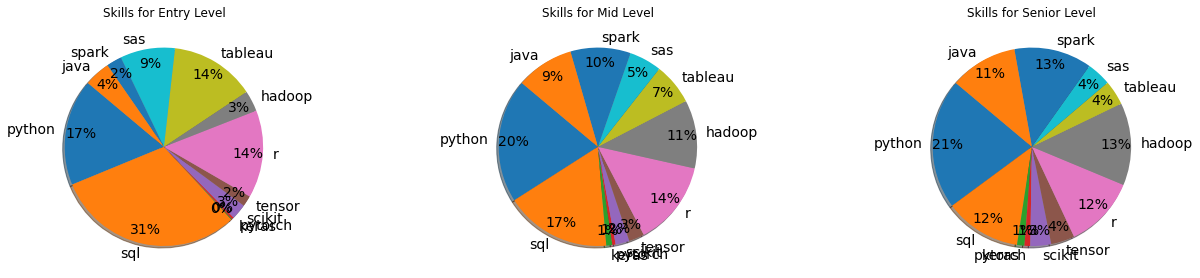

In [ ]:
fig, axes = plt.subplots(1, 3,figsize=(20, 20))
labels1=['python','sql','keras', 'pytorch', 'scikit', 'tensor', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java']
sizes1 =[556,985,4,11,81,56,459,109,445,287,80,136]
sizes2 =[1818,1560,88,48,204,227,1249,1003,610,477,883,849]
sizes3= [951,559,54,42,152,172,526,602,181,177,568,495]
axes[0].pie(sizes1, labels=labels1,autopct='%.0f%%',textprops={'fontsize': 14},
                            shadow=True,pctdistance=0.85, startangle=140)
axes[0].set_title('Skills for Entry Level')
axes[1].pie(sizes2, labels=labels1,autopct='%.0f%%',textprops={'fontsize': 14},
                   shadow=True,pctdistance=0.85,startangle=140 )
axes[1].set_title('Skills for Mid Level')
axes[2].pie(sizes3, labels=labels1,autopct='%.0f%%',textprops={'fontsize': 14},
                            shadow=True,pctdistance=0.85,startangle=140 )
axes[2].set_title('Skills for Senior Level')
fig.subplots_adjust(wspace=0.75)